In [125]:
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
import cv2

BASE_PATH = '3000566.000000-NA-03192'

### Load full tomography

In [ ]:
ds = dcmread(f'{BASE_PATH}/1-127.dcm')
body = np.array([dcmread(f'{BASE_PATH}/1-{i:03d}.dcm').pixel_array for i in range(1,134)])

### MIP (by amax's axis)

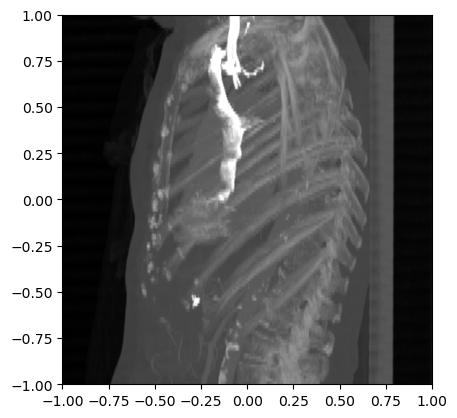

In [142]:
plt.imshow(np.amax(body, axis=2), cmap="gray", extent=[-1,1,-1,1])

### MIP (by transposing)

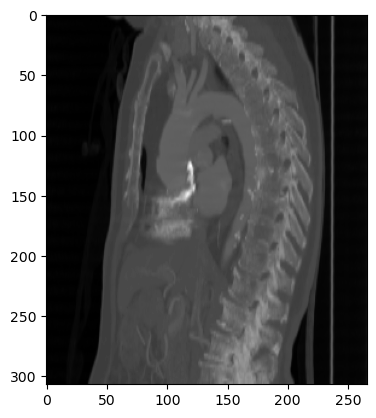

In [153]:
transposed = np.transpose(body, axes=(2, 0, 1))
selected_slices = transposed[230:260]
mip = np.amax(selected_slices, axis=0)
image_size = (int(mip.shape[0]*2), int(mip.shape[1]*0.6))
mip_stretched = cv2.resize(mip, dsize=image_size)
plt.imshow(mip_stretched, cmap="gray")
plt.imsave('mip.jpeg', mip_stretched, cmap="gray")
